In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *

In [3]:
path=r"D:\DATASETS\snakes\train"
images=get_image_files(path)
print(images[:5])

[Path('D:/DATASETS/snakes/train/non-venomous/110/011195c20fe046308d9fc21c2834c19e.jpg'), Path('D:/DATASETS/snakes/train/non-venomous/110/0539cdc45044420d95a0d1ab4c418806.jpg'), Path('D:/DATASETS/snakes/train/non-venomous/110/0a52a1e00dd44805a1e2a803cd22ffe8.jpg'), Path('D:/DATASETS/snakes/train/non-venomous/110/0b4a183f5e7648569d3e99976760b771.jpg'), Path('D:/DATASETS/snakes/train/non-venomous/110/0c737fb458b14776856692a65affa776.jpg')]


In [4]:
def get_labels(filepath):
    species=filepath.parent.name
    poison=filepath.parent.parent.name

    return [species,poison]
    

In [5]:
dls=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
              get_items=get_image_files,
              get_y=get_labels,
              splitter=RandomSplitter(0.2,seed=50),
              item_tfms=Resize(226),
              batch_tfms=aug_transforms()
                              
             ).dataloaders(path,bs=16)

In [6]:
print(dls.vocab)

['110', '111', '113', '114', '122', '135', '140', '155', '158', '159', '162', '163', '165', '168', '169', '175', '177', '18', '180', '185', '186', '188', '189', '191', '193', '195', '20', '203', '215', '216', '220', '226', '238', '25', '255', '26', '263', '280', '284', '302', '315', '319', '321', '323', '335', '338', '345', '348', '352', '360', '363', '364', '368', '373', '381', '383', '384', '39', '396', '41', '422', '424', '427', '429', '430', '441', '448', '453', '454', '457', '462', '464', '470', '474', '477', '48', '481', '485', '495', '497', '507', '515', '52', '54', '544', '545', '546', '560', '562', '57', '575', '576', '578', '590', '60', '603', '605', '609', '616', '617', '619', '623', '628', '629', '634', '65', '651', '652', '656', '672', '674', '675', '678', '686', '690', '691', '696', '698', '699', '701', '71', '725', '73', '738', '740', '741', '746', '747', '751', '755', '758', '83', '87', '88', '99', 'non-venomous', 'venomous']


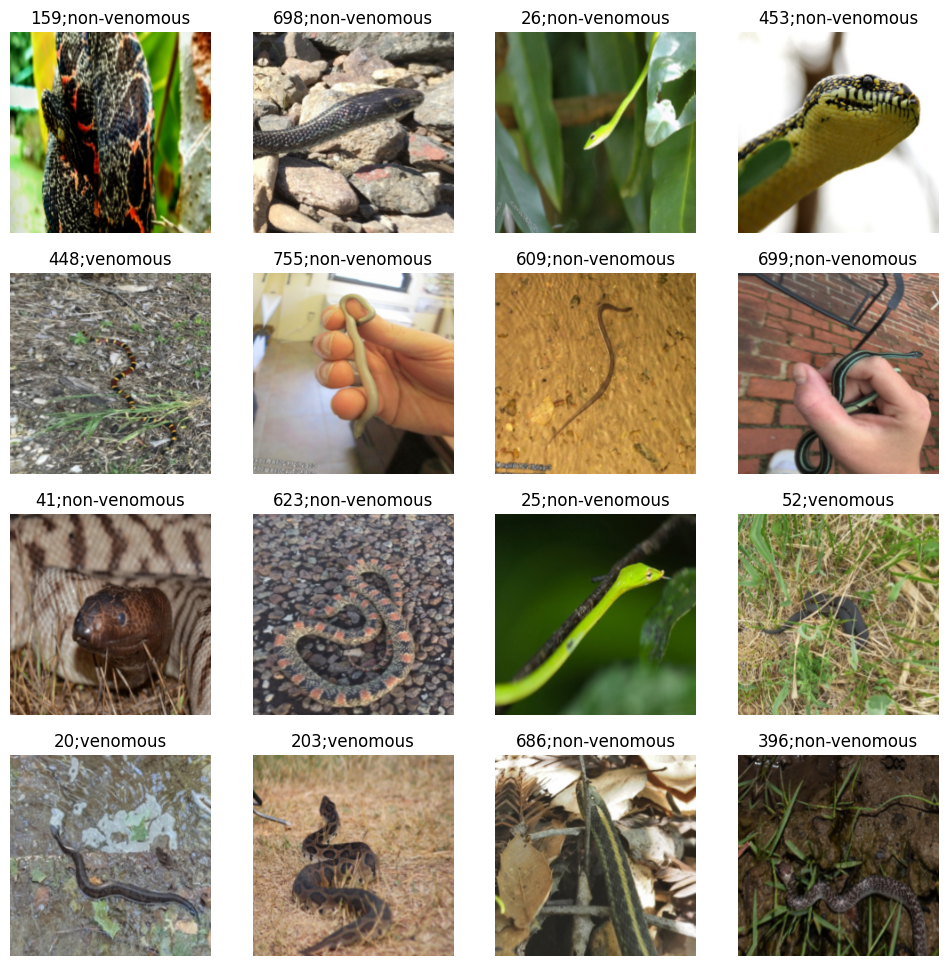

In [7]:
dls.show_batch(max_n=18)

In [8]:
learn=vision_learner(dls,resnet18,metrics=accuracy_multi)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.049996,0.043187,0.988910,14:18


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.040594,0.035145,0.990013,11:02
1,0.037910,0.033163,0.990181,09:29
2,0.035932,0.032233,0.990593,08:52
3,0.033391,0.031215,0.990614,08:34
4,0.029818,0.029852,0.991011,09:01
5,0.027489,0.027883,0.991526,09:02
6,0.024485,0.027046,0.991711,09:00
7,0.023151,0.027188,0.991922,08:38
8,0.020942,0.027058,0.991930,08:36
9,0.020875,0.026834,0.991969,08:36


In [9]:
learn.validate()


(#2) [0.026834432035684586,0.9919691681861877]